## Exercício de tratamento de dados
---
Os dados devem estar nesses padrões:

* Aparência: sol, nublado, chuva
* Temperatura: -130 ~ 130F
* Umidade: 0 ~ 100 
* Jogar: sim/não
* Tratar valores NaN
---

#### Imports

In [1]:
import pandas as pd
import seaborn as srn
import statistics as sts
import warnings
warnings.filterwarnings('ignore')

#### Importando dados

In [14]:
dataset = pd.read_csv('..\..\data\Tempo.csv', sep=';')
dataset.head()

,Aparencia,Temperatura,Umidade,Vento,Jogar
0,sol,85,85.0,FALSO,nao
1,sol,80,90.0,VERDADEIRO,nao
2,nublado,83,86.0,FALSO,sim
3,chuva,70,NaN,FALSO,sim
4,chuva,68,80.0,FALSO,sim


#### Explorando dados categóricos aparência

In [15]:
grouping = dataset.groupby(['Aparencia']).size()
grouping

Aparencia
chuva      5
menos      1
nublado    3
sol        5
dtype: int64

#### Verificando se existe algum NaN em aparência

In [23]:
dataset['Aparencia'].isnull().sum()

0

#### Substituindo 'menos' por 'sol'

In [19]:
dataset.loc[dataset['Aparencia'] == 'menos', 'Aparencia'] = 'sol'

#### Revendo dados atualidados aparência

In [20]:
grouping = dataset.groupby(['Aparencia']).size()
grouping

Aparencia
chuva      5
nublado    3
sol        6
dtype: int64

<AxesSubplot: xlabel='Aparencia'>

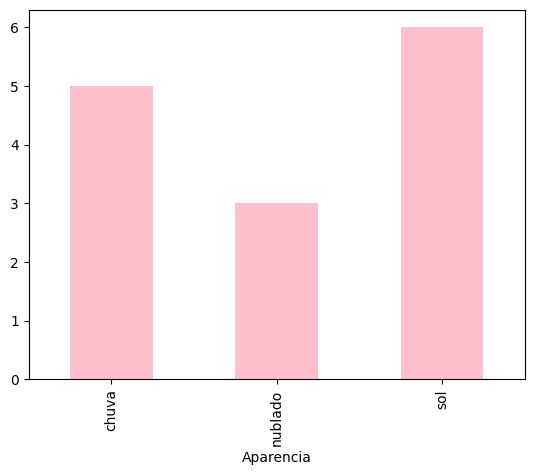

In [21]:
grouping.plot.bar(color='pink')

#### Explorando dados categóricos temperatura

In [22]:
grouping = dataset.groupby(['Temperatura']).sum()
grouping

,Umidade
Temperatura,
64,65.0
65,70.0
68,80.0
69,70.0
70,0.0
71,91.0
72,90.0
75,270.0
80,90.0
